In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
from mcu_chamfer import MCUChamferModel


In [102]:
figure_num = 10**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
lw = np.array([0, -75])
up = np.array([20, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUChamferModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [103]:
mcu_model.train()
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



rre_median_embedding_vs_params: 0.004356633047170452


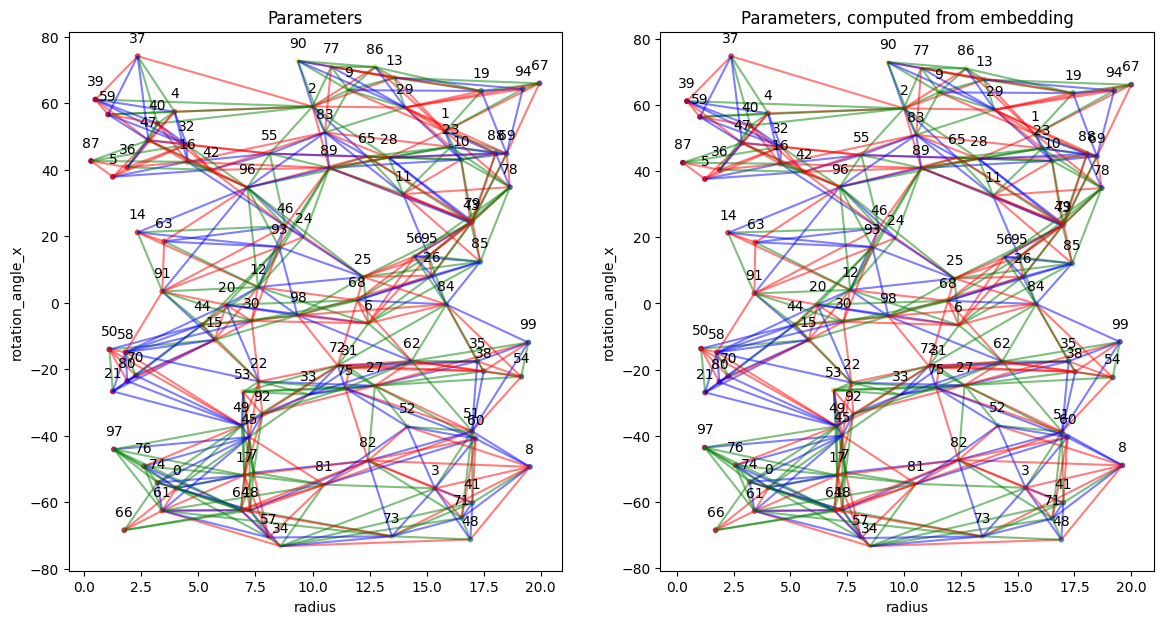

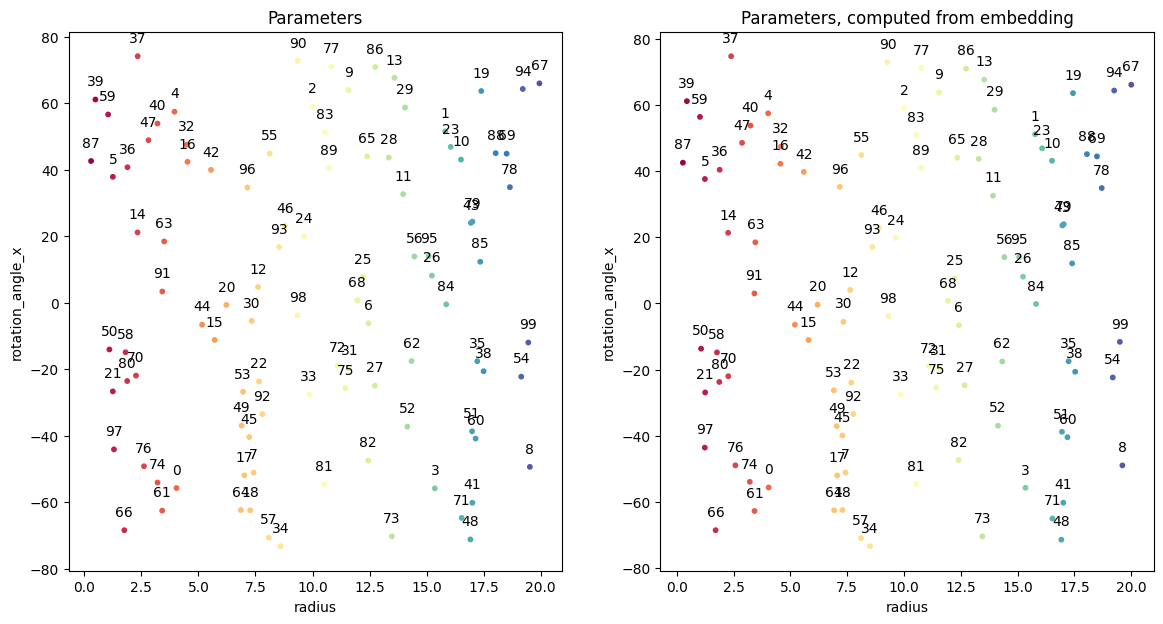

In [109]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [107]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt=500, noise_level=0, pieces_cnt=10, test_data_size=10, same_value=False)

Finding neighbors: 64 ms , optimization: 1 ms
-----------
x_opt  = [  4.04932032 -62.13152442], x_err = 0.011889287281836941
x_real = [  1.70378275 -74.28700513]
Finding neighbors: 75 ms , optimization: 1 ms
-----------
x_opt  = [  4.00351882 -61.8343927 ], x_err = 0.011721015037266075
x_real = [  0.6208898  -72.65288228]
Finding neighbors: 65 ms , optimization: 1 ms
-----------
x_opt  = [  2.69154351 -59.59185489], x_err = 0.0024331420489004667
x_real = [  1.98176525 -63.68478728]
Finding neighbors: 62 ms , optimization: 1 ms
-----------
x_opt  = [  2.66326172 -61.48104035], x_err = 0.0021558059037969104
x_real = [  1.74050576 -70.46405148]
Finding neighbors: 62 ms , optimization: 1 ms
-----------
x_opt  = [  2.49185374 -59.03628854], x_err = 0.0023535360028807996
x_real = [  0.81659562 -63.53392979]
Finding neighbors: 62 ms , optimization: 0 ms
-----------
x_opt  = [  2.64502025 -60.70525515], x_err = 0.0024962329101556407
x_real = [  1.50227457 -68.22264403]
Finding neighbors: 61 ms

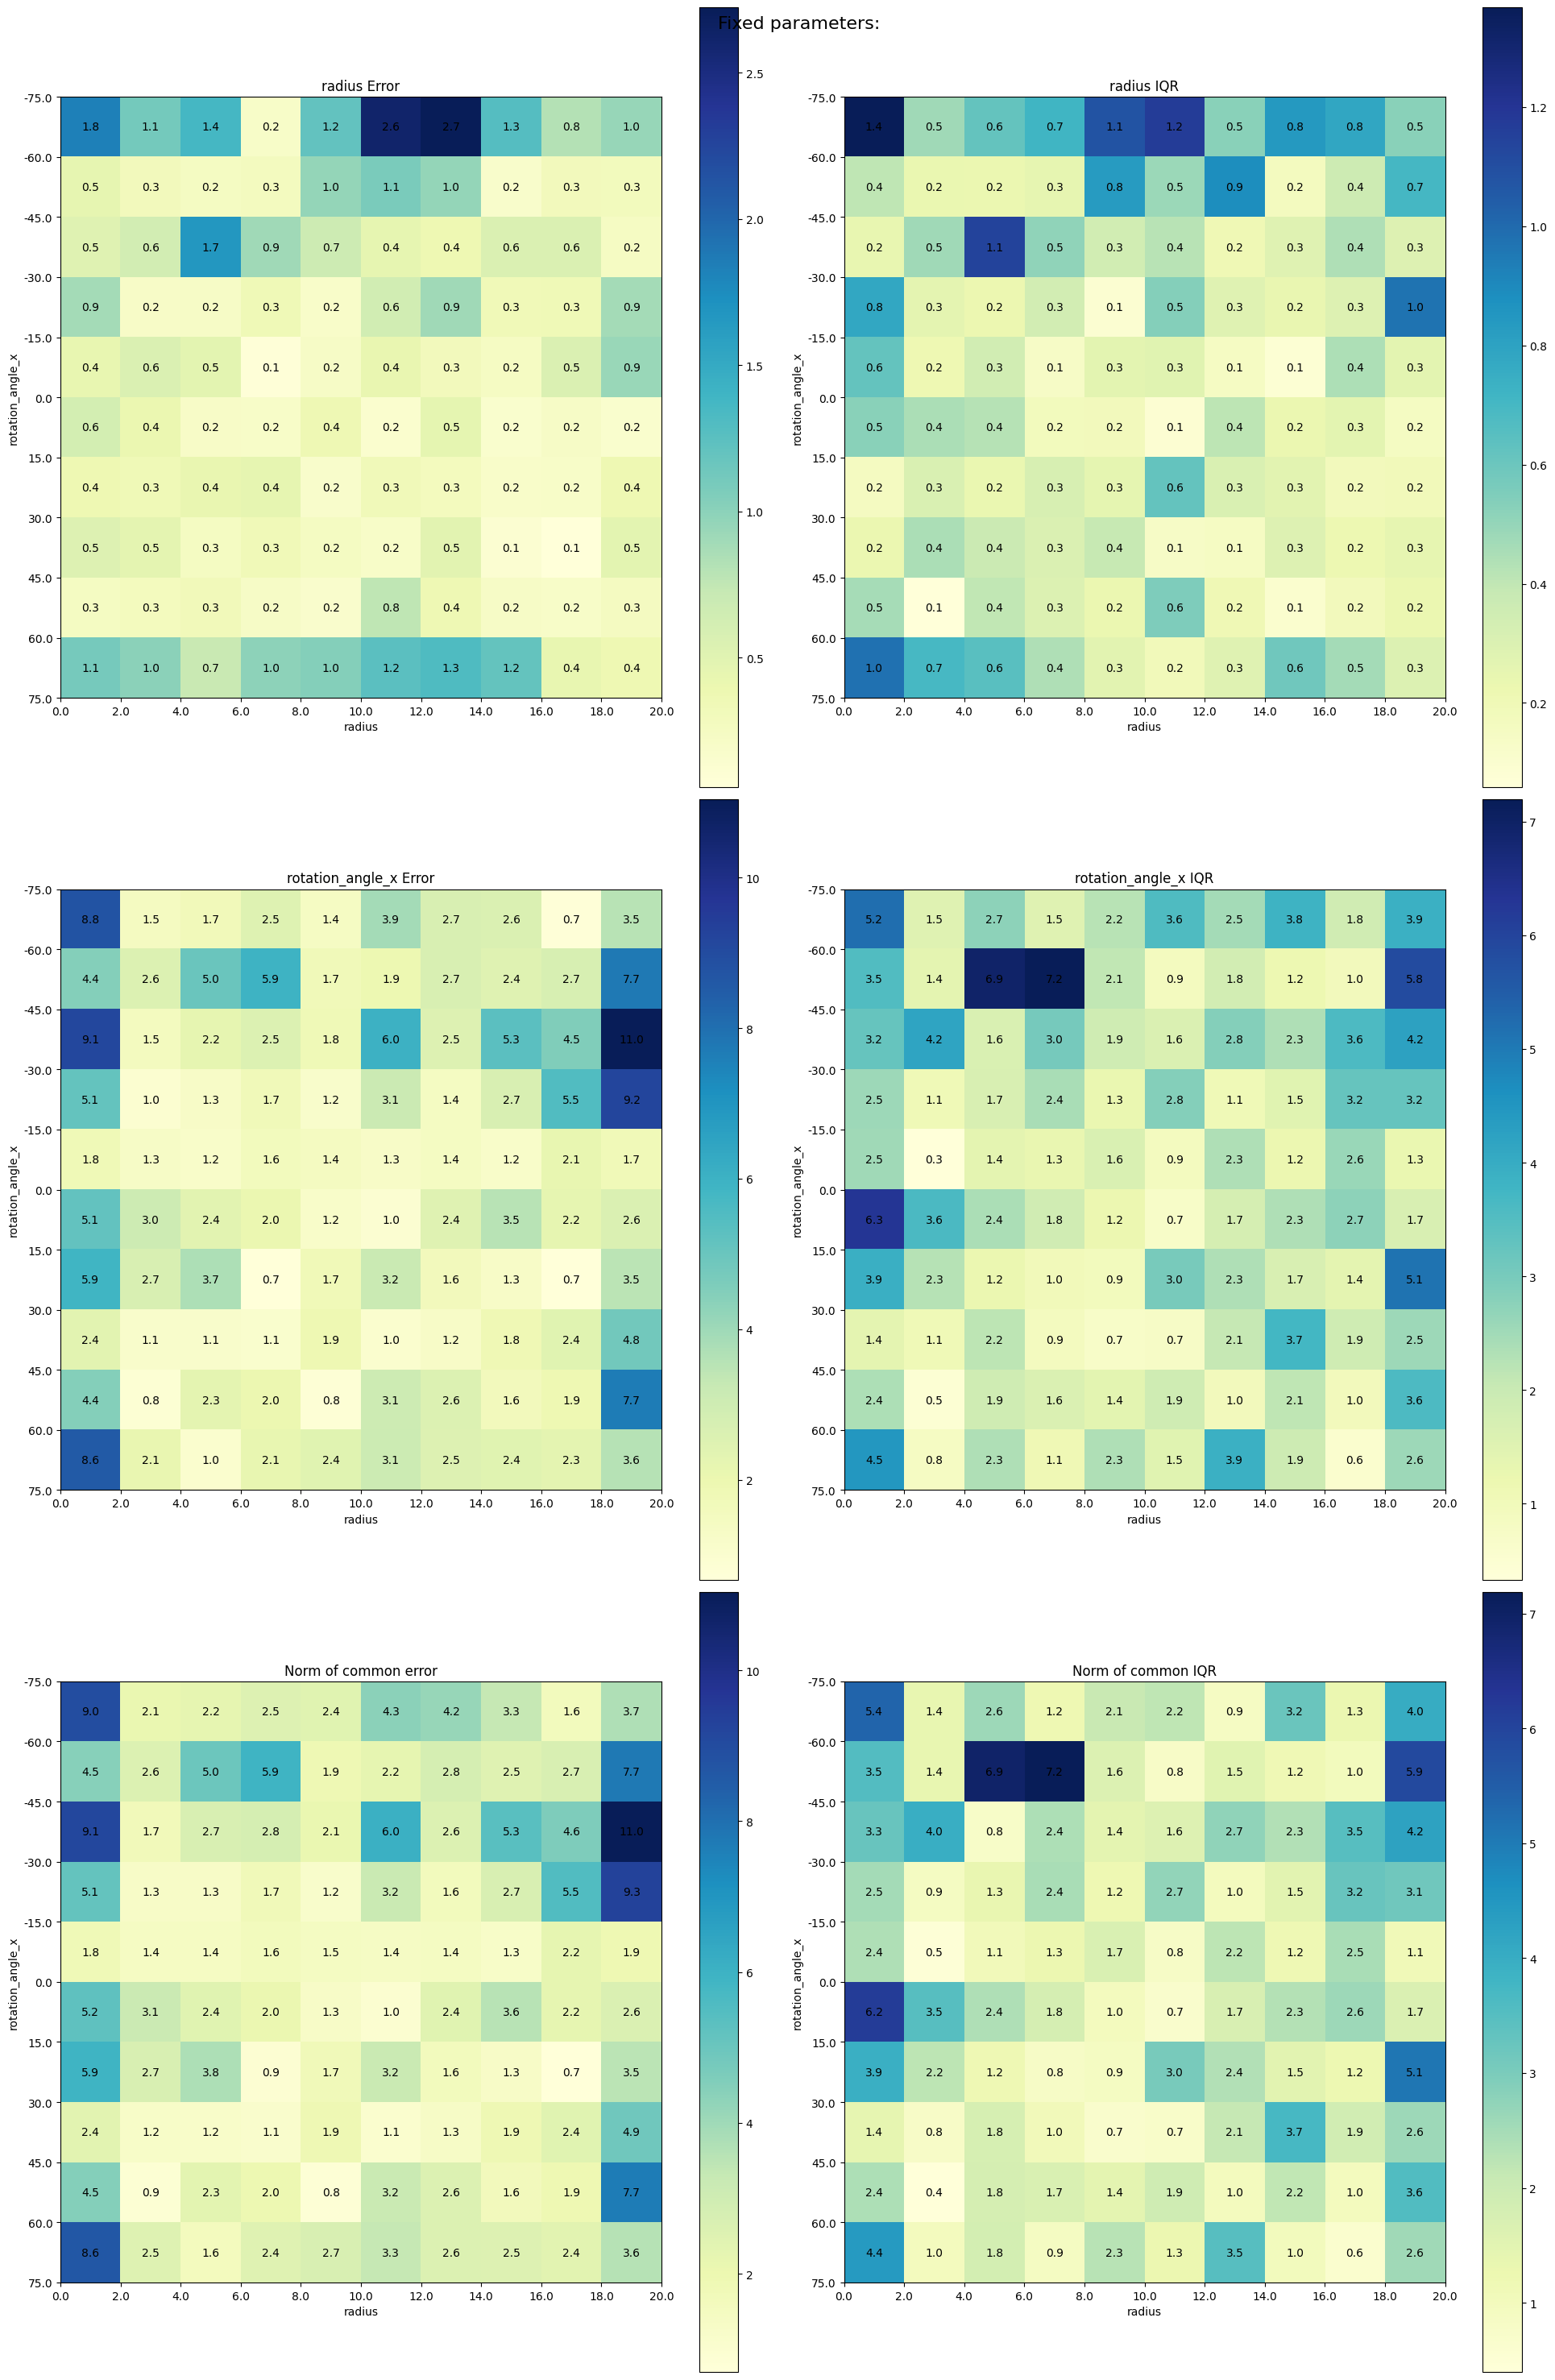

In [112]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map={})